# What is the effect of attributes on the business success

## Introduction

  As the digital age progresses, more and more consumers are happy to share their reviews of a business (especially a service industry) online. These reviews generally comes in two forms, ratings (out of 5) and text comments. These evaluations are determined by how satisfied consumers are with the services provided by the business. Most of the time when considering the success of a business, people are judged based on the profits that the business has made. In this project, I put myself in the shoes of the consumer and produce a new rating factor called business success that derived from a combination of these consumer ratings and the volume of reviews. When a business gets a high rating and has a lot of reviews at the same time, it will score high in business success. And the research question that this project is to identify what is the effect of attributes on the business success.
    
The data I used is sourced from Yelp, one of the most popular business directories worldwide. It is made up of five different subsets: (business, review, user, check-in and tip.) The source of the data is primarily 8 metropolitan areas in the USA and Canada. This dataset contains business ID, name, location details (address, city, state, postal code, latitude, longitude), operational aspects ( attributes, hours), and consumer-generated metrics (stars, review count). To enrich my analysis, I added three additional variables, which are total hour (he total number of operational hours per week for each business), attribute point (the total number of attributes a business offers), and business success, a combination of stars and review count

  The findings from the data analysis shows that businesses offering a higher number of attributes tend to report greater success, while increasing operational hours does not necessarily translate into imporve business success.


## Data Cleaning/Loading

In [127]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from tabulate import tabulate

df_b = pd.read_json(r"yelp_academic_dataset_business.json", lines=True)
#Import packages and data

In [128]:
has_na = df_b.isna().any().any()

print(f"Are there any missing values in the DataFrame? {has_na}")
#exam is there any the missing value

Are there any missing values in the DataFrame? True


In [129]:
df_b_c = df_b.dropna()
#Drop all the missing value

In [130]:
df_b_c = df_b_c.copy()
df_b_c.loc[:, 'business_success'] = df_b_c['stars'] * 0.5 + (100 - df_b_c['review_count'].rank(pct=True, ascending=False) * 100) / 40
# Create the 'business_success' column.

**Grenerate business_success**
* S as the value from the 'stars' column for a business.
* R as the percentile rank of the 'review_count' for a business, calculated with the dataset sorted in descending order (higher review counts have lower percentile ranks).

The formula for 'business_success' can be expressed as:
$$
Business\_Success = 0.5 \cdot S + \frac{100 - R \cdot 100}{40}
$$ 
The second part $\frac{100 - R \cdot 100}{40}$ adjusts the percentile rank to ensure it scales appropriately within the overall success score. Since R is a percentile rank, multiplying it by 100 gives a number between 0 and 100, which is then adjusted to fit into a 0 to 5 scale (the same range as the stars rating) after the transformation.
The formula weights these two components equally (0.5). This weighting suggests that both quality (as perceived by customers) and engagement (as measured by reviews) are of equal importance to the business's success.
It shows a view of a business's performance in the market.

In [131]:
# Define a list of attributes that are considered attractive.
attractive_attributes = ['AcceptsInsurance', 'AgesAllowed', 'Alcohol', 'Ambience', 'BYOB', 'BestNights', 'BikeParking', 'BusinessAcceptsBitcoin', 'BusinessAcceptsCreditCards', 'BusinessParking', 'Caters', 'CoatCheck', 'DogsAllowed', 'DriveThru', 'GoodForDancing', 'GoodForKids', 'GoodForMeal', 'HairSpecializesIn', 'HappyHour', 'HasTV', 'Music', 'Open24Hours', 'OutdoorSeating', 'RestaurantsAttire', 'RestaurantsCounterService', 'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut', 'Smoking', 'WheelchairAccessible', 'WiFi']

# Function to count attractive attributes.
def count_attractive_attributes(row):
    return sum(1 for attr in attractive_attributes if row.get(attr) == 'True')

# Apply the function to each row.
df_b_c.loc[:, 'attribute_point'] = df_b_c['attributes'].apply(count_attractive_attributes)

In [132]:
# Function to check credit card acceptance
def check_credit_card(attr):
    return 1 if attr.get('BusinessAcceptsCreditCards') == 'True' else 0
df_b_c['accepts_credit_card'] = df_b_c['attributes'].apply(check_credit_card)

# Combined function to check for business and bike parking
def check_parking_options(attr):
    return 1 if attr.get('BikeParking') == 'True' else 0
df_b_c['bike_parking'] = df_b_c['attributes'].apply(check_parking_options)

**Generate attribute_point**

It gives the total number of attributes a business offers

In [133]:
#Function to count total operatioanl hour per week
def calculate_daily_hours(time_range):
    if time_range == '0:0-0:0' or time_range is None:
        return 0
    open_time, close_time = time_range.split('-')
    open_time = datetime.strptime(open_time, '%H:%M')
    close_time = datetime.strptime(close_time, '%H:%M')
    return (close_time - open_time).seconds / 3600

# Function to calculate total weekly hours
def calculate_total_hours(hours_dict):
    total_hours = 0
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        total_hours += calculate_daily_hours(hours_dict.get(day))
    return total_hours

# Apply the function to each row
df_b_c.loc[:, 'total_hour'] = df_b_c['hours'].apply(calculate_total_hours)

**Generate total_hour**

It gives each business's total operational hours in one week

Summary Statistics Tables
==========================

In [150]:
# Generate the summary statistics for the specified columns
summary_stats = df_b_c[['accepts_credit_card', 'bike_parking', 'total_hour', 'attribute_point', 'business_success']].describe()

# Display the table
summary_stats

,accepts_credit_card,bike_parking,total_hour,attribute_point,business_success
count,117618.000000,117618.000000,117618.000000,117618.000000,117618.000000
mean,0.855668,0.425573,57.293983,3.788077,3.079650
std,0.351427,0.494432,26.821910,3.175178,0.858535
min,0.000000,0.000000,0.000000,0.000000,0.595702
25%,1.000000,0.000000,41.750000,1.000000,2.502542
50%,1.000000,0.000000,56.000000,3.000000,3.082789
75%,1.000000,1.000000,73.500000,6.000000,3.753261
max,1.000000,1.000000,167.883333,16.000000,4.993028


### Findings

1. **Accept Credit Card**
   - Mean: 0.855668 suggests that about 85.57% of businesses accept credit cards. This shows that most businesses accept credit cards.
   - Standard Deviation: It indicates a moderate variability in businesses accepting credit cards.
   - Implication: A high mean value indicates that accepting credit cards potentially influences business success by accommodating customers' payment preferences.
<br/>
2. **Bike Parking**
   - Mean: 0.425573 shows that approximately less than half of businesses offer bike parking.
   - Standard Deviation: This high standard deviation relative to the mean suggests variability among businesses offering parking for bikes.
   - Implication: This attribute might influence business success in areas where biking is a popular mode of transportation.
<br/>
3. **Total Hour**
   - Mean: On average, businesses are operational for approximately 57.29 hours per week. This suggests a typical workweek slightly over the standard 40-hour workweek, indicating many businesses may operate on weekends or have extended hours on some days.
   - Standard Deviation: The standard deviation is really high. This variability suggests a wide range in operational hours among businesses, with some operating much less than the average and others significantly more.
   - Maximum: Some businesses open 24 hours each day.
   - Implication: Longer operating hours might correlate with higher business success, indicating availability to customers.
<br/>
4. **Attribute Point**
   - Mean: On average, businesses provide about 4 attributes to consumers.
   - Standard Deviation: It shows a wide spread in scores, suggesting businesses vary significantly in how many or which attributes they possess.
   - Implication: Higher attribute points might correlate with more business features or services that could contribute to success.
<br/>
5. **Business Success**
   - Mean: The average business rating falls slightly above the midpoint on a scale ranging from 0 to 5.


Data Visualization
===================
The variables chosen for analysis are'Total Hour,' 'Attribute Point,' 'Accepts Credit Card,' and 'Bike Parking Available,' and they are being examined in relation to 'Business Success.' The choice of these variables comes from the assumption that a business's operational aspects significantly impact customer satisfaction, which in turn contributes to what I define as business success. I select 'Accepts Credit Card,' and 'Bike Parking Available' out of the attributes to analyze because these are the two factors that the majority of consumers will take into account when making choices or evaluations

This approach allows us to make quantitative measurement of business performance from a consumer perspective, providing insights that go beyond the financial profit. By exploring these dimensions, I aim to reveal the operational factors like attributes and working hours that drive consumer satisfaction and, by extension, business success. This analysis not only addresses our research question but also offers valuable suggestions for businesses aiming to enhance their market position.

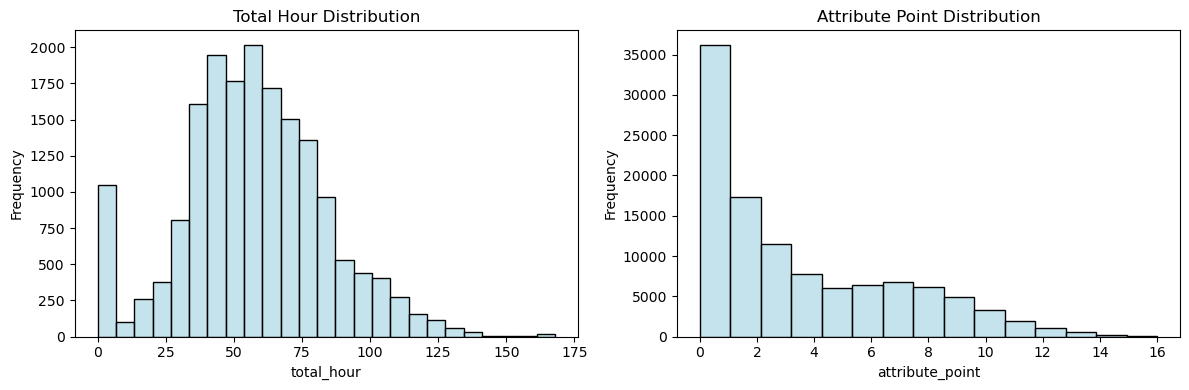

In [143]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

sns.histplot(df_b_c['total_hour'], bins=25, color='lightblue', edgecolor='black', alpha=0.7, stat='frequency', ax=axes[0])
axes[0].set_title('Total Hour Distribution')

sns.histplot(df_b_c['attribute_point'], bins=15, color='lightblue', edgecolor='black', alpha=0.7, stat='frequency', ax=axes[1])
axes[1].set_title('Attribute Point Distribution')

plt.tight_layout()
plt.show()

**Total Hour Distribution**

The observation that the frequency of businesses with 0 business hours is high could indeed suggest several possibilities, one of which might be an issue with data collection. However, the shape of the distribution is approximately normal (bell-shaped), and it is a right-skewed distribution, showing that fewer businesses have very high total operational hours.

**Attribute Point Distribution**

It depicts a highly right-skewed distribution, indicating that most businesses have a low attribute point score. Same with total hour, frequency of businesses with 0 business hours is considerably high.

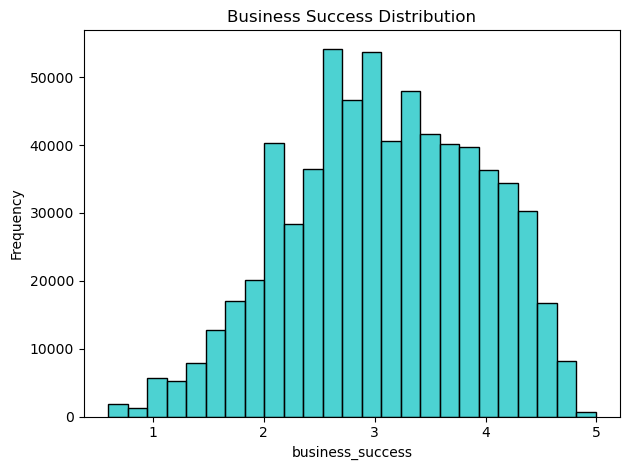

In [136]:
sns.histplot(df_b_c['business_success'], bins=25, color='c', edgecolor='black', alpha=0.7, stat='frequency').set_title('Business Success Distribution')
plt.tight_layout()
plt.show()

**Business Success Distribution**

It presents a more symmetrical distribution but with a slight right skew. It implies that most businesses have a moderate level of success, with fewer businesses at the lower and higher ends of the success scale.

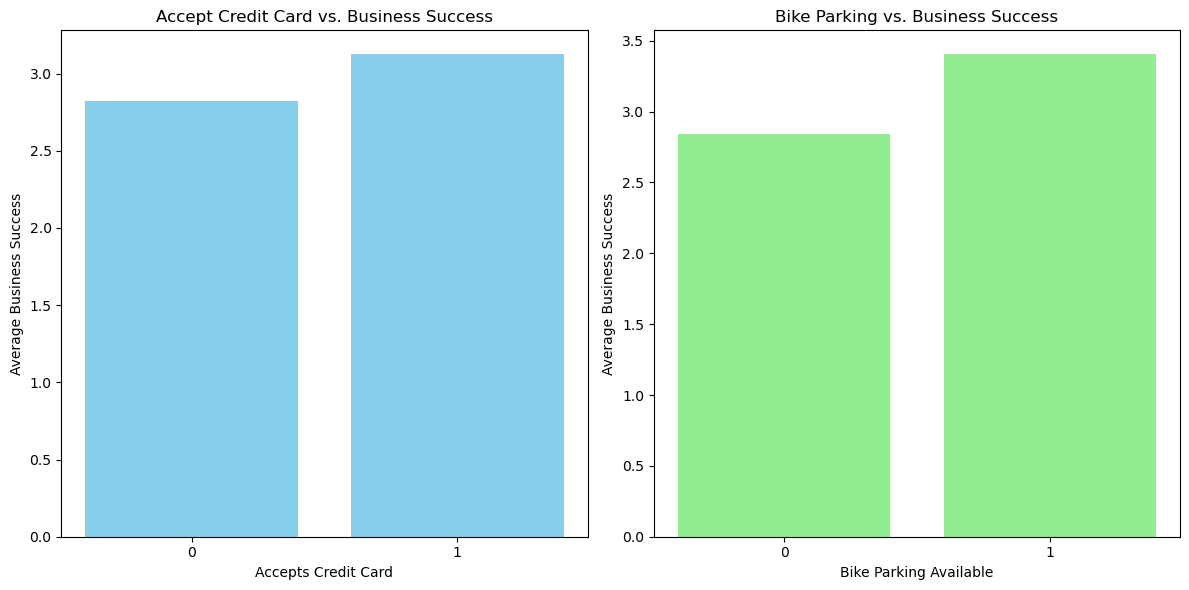

In [137]:
# Calculate the average business success for each category of 'accepts_credit_card' and 'bike_parking'
avg_success_credit_card = df_b_c.groupby('accepts_credit_card')['business_success'].mean().reset_index()
avg_success_bike_parking = df_b_c.groupby('bike_parking')['business_success'].mean().reset_index()

# Now, plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for Accept Credit Card vs. Business Success
axs[0].bar(avg_success_credit_card['accepts_credit_card'].astype(str), avg_success_credit_card['business_success'], color='skyblue')
axs[0].set_title('Accept Credit Card vs. Business Success')
axs[0].set_xlabel('Accepts Credit Card')
axs[0].set_ylabel('Average Business Success')

# Bar plot for Bike Parking vs. Business Success
axs[1].bar(avg_success_bike_parking['bike_parking'].astype(str), avg_success_bike_parking['business_success'], color='lightgreen')
axs[1].set_title('Bike Parking vs. Business Success')
axs[1].set_xlabel('Bike Parking Available')
axs[1].set_ylabel('Average Business Success')

plt.tight_layout()
plt.show()

From the 'Accept Credit Card vs. Business Success' graph, it is observable that businesses that accept credit cards have a higher average success than those that do not. In the 'Bike Parking vs. Business Success' graph, the same pattern is observed, with larger increase. This suggests that credit card acceptance and bike parking availability positively correlate with business success. And bike parking is more inmportant factor to consumer. The presence of these attributes might indicate a more customer-friendly approach, potentially enhancing customer satisfaction.

However, it's important to note that the increase in business success positive related to these attributes does not appear to be significant based on the scale provided. This suggests that while the attributes may contribute to business success, they are likely not the sole factors.

In [138]:
def generate_binned_scatter_plot(x, y, num_bins=10, y_lim=(0, 5), x_label='X-axis', y_label='Y-axis',title = 'Title'):
    """
    Generate a binned scatter plot.
    """
    # Bin the x-data
    bins = np.linspace(min(x), max(x), num_bins+1)
    indices = np.digitize(x, bins)

    # Calculate the mean y-value for each bin
    bin_means = [np.mean(y[indices == i]) for i in range(1, len(bins))]

    # Plot the original data as a scatter plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot the binned data
    ax.scatter(bins[:-1], bin_means, color='red', s=50, label='Binned means') 

    # Set the labels and limits
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(*y_lim)  # Set the y-axis range based on the provided y_lim parameter
    ax.set_title(title)
    ax.legend()

    # Display the plot
    plt.show()
    
    return fig, ax


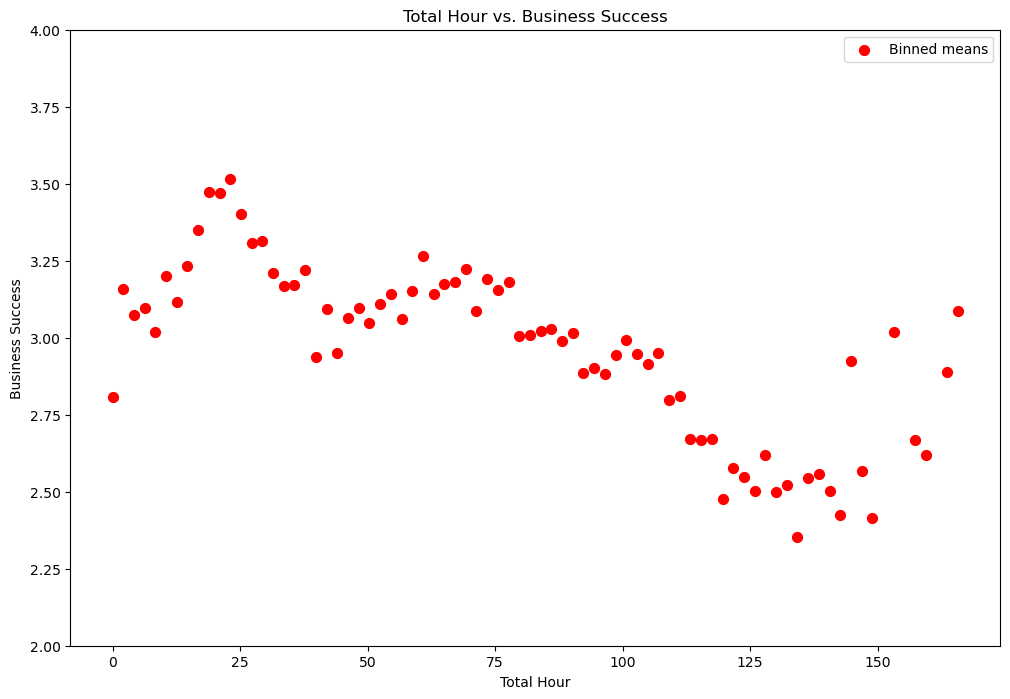

In [139]:
generate_binned_scatter_plot(df_b_c['total_hour'], df_b_c['business_success'], num_bins=80, y_lim=(2, 4), x_label='Total Hour', y_label='Business Success',title ='Total Hour vs. Business Success')
plt.ioff()
plt.tight_layout()

"Total Hour vs. Business Success" initially shows an increase in business success up to a score of 3.5 as total operational hours rise. However, contrary to the common belief that extended hours might equate to greater consumer convenience and satisfaction, the graph indicates a subsequent decline in the success score. This suggests that an increase in operating hours does not necessarily correlate with increased consumer satisfaction. This could be quality over quantity approach from the consumers' perspective, where extended service hours do not compensate for the quality of service or product offered. The observed trend may also be a manifestation of consumers experiencing diminishing marginal returns, particularly in service industry sectors, where the added value of each extra hour diminishes beyond a certain point.

<Figure size 640x480 with 0 Axes>

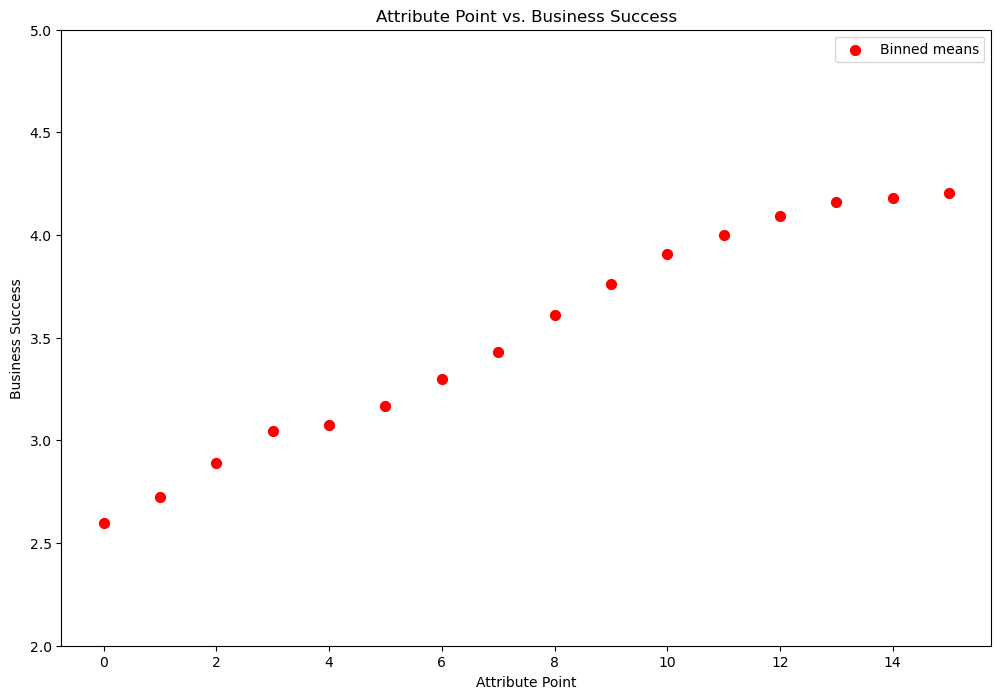

In [140]:
generate_binned_scatter_plot(df_b_c['attribute_point'], df_b_c['business_success'], num_bins=16, y_lim=(2, 5), x_label='Attribute Point', y_label='Business Success',title ='Attribute Point vs. Business Success')
plt.ioff()
plt.tight_layout()

"Attribute Point vs. Business Success," shows a positive relationship between the number of attribute points and the level of business success. This finding is consistent with previous data such as "Accept Credit Card vs. Business Success" and "Bike Parking vs. Business Success." It indicates that added features contribute positively to consumer feedback and attraction. This upward trend is coherent with economic theories of utility, where the utility — a representation of consumer satisfaction — increases with the accumulation of favorable attributes. The cumulative effect of these attributes plays a significant role in business success, likely because they enhance the consumer experience and thereby encourage positive consumer engagement.

<Figure size 640x480 with 0 Axes>

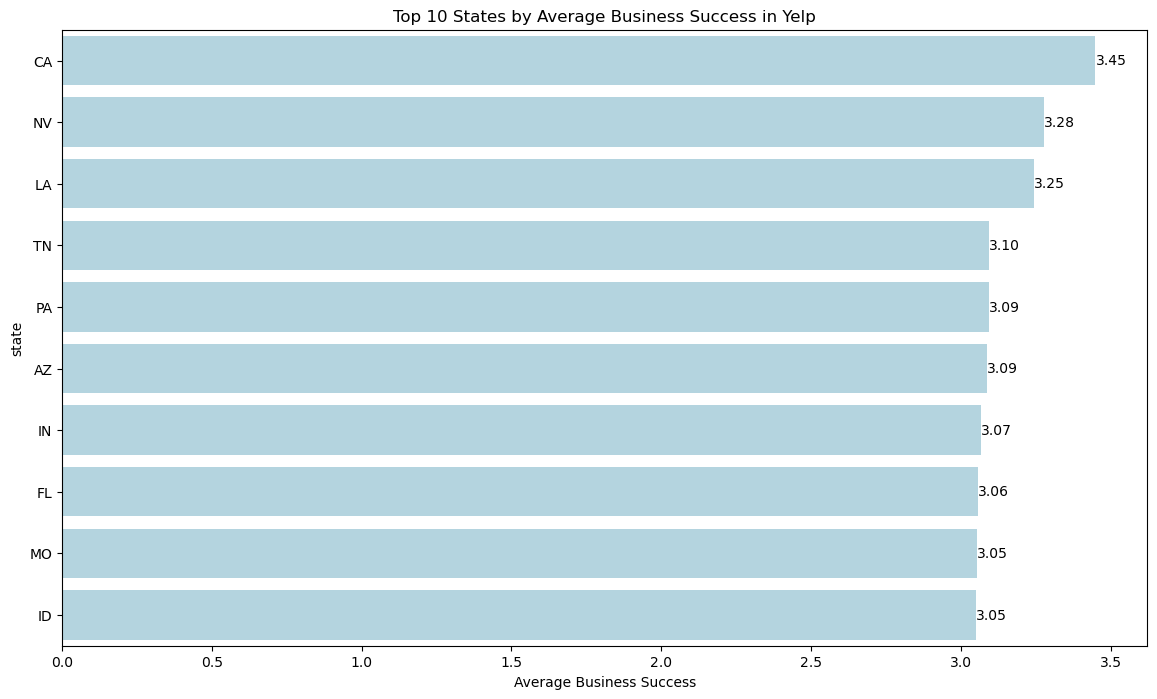

In [141]:
business_count_by_state = df_b_c.groupby('state').size()

# Filter the states with a business count of at least 1000.
states_with_enough_businesses = business_count_by_state[business_count_by_state >= 1000].index

# Now filter the original DataFrame to only include these states.
df_b_filtered = df_b_c[df_b_c['state'].isin(states_with_enough_businesses)]

# calculate the mean of business success for each state and get the top 10.
avg_state = df_b_filtered.groupby('state')['business_success'].mean().sort_values(ascending=False)[:10]

# Plotting
plt.figure(figsize=(14,8))
ax = sns.barplot(x=avg_state.values, y=avg_state.index, color='lightblue')

plt.xlabel('Average Business Success')
plt.title('Top 10 States by Average Business Success in Yelp')

# Iterate over the bars of the barplot (contained in ax.patches)
for bar in ax.patches:
    # Use the bar's width to place the annotation at the end of the bar
    ax.text(bar.get_width(), # x-coordinate position
            bar.get_y() + bar.get_height()/2, # y-coordinate position
            '{:.2f}'.format(bar.get_width()), # bar label, formatted to 2 decimal places
            va='center', # center alignment vertically
            ha='left') # left alignment horizontally

plt.show()

The geography could also be a factor that influences business success. After filtering out states with a lower number of businesses to minimize bias, it is apparent that the top 10 states of the Yelp average business success ratings all possess prosperous economies. This observation reveals the correlation between business success and the local economic environment.

## Conclusion

In this project, I tackle the operatioanl aspect that could effect business success from consumer side. The statistical examination reveals that approximately 85.57% of businesses accept credit cards, indicating a strong preference for this payment method among businesses. This could cater to a wider customer base by satisfying their payment preferences. Conversely, bike parking is less common, with less than half of the businesses offering this attributes. Operational hours show a high degree of variability among businesses, with some operating around the clock and others far less.


The comparative analysis of business attributes against business success reveals a positive correlation between the presence of consumer-friendly amenities (such as credit card acceptance and bike parking) and higher business ratings. This suggests that such attributes, while not the sole determinants of success, contribute positively to customer satisfaction and, by extension, business success. The "Total Hour vs. Business Success" analysis introduces a uncommon perspective: increasing in operating hours does not necessarily equate to greater consumer satisfaction. 

Furthermore, the geographical analysis indicates that business success is not evenly distributed but correlates with the local economic environment, with businesses in more prosperous states showing higher average success ratings. This understanding of business success factors emphasizes the importance of fitting customer preferences and the broader economic context in which businesses operate.